In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("hospital_readmissions (1).csv")
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [8]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [9]:
df["A1C_Result"].describe()

count          566
unique           2
top       Abnormal
freq           301
Name: A1C_Result, dtype: object

In [10]:
df["A1C_Result"].fillna("Not_Taken", inplace=True)


In [11]:
df

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Not_Taken,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,Not_Taken,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,Not_Taken,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Not_Taken,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No
996,997,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No
997,998,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No
998,999,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No


#EDA EXPLOITARY DATA ANALYSIS

In [12]:
print(df['Readmitted'].value_counts())

No     503
Yes    497
Name: Readmitted, dtype: int64


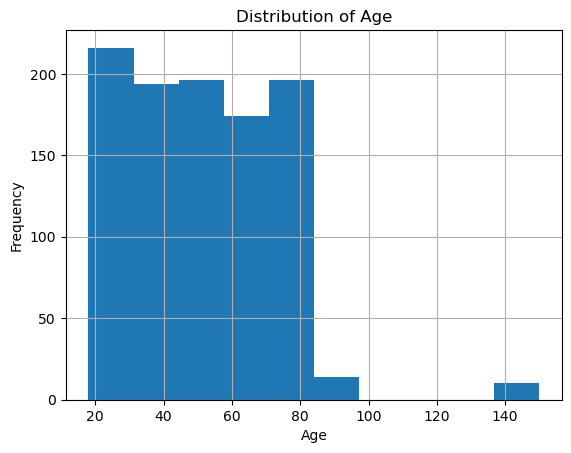

In [13]:
import matplotlib.pyplot as plt
df['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

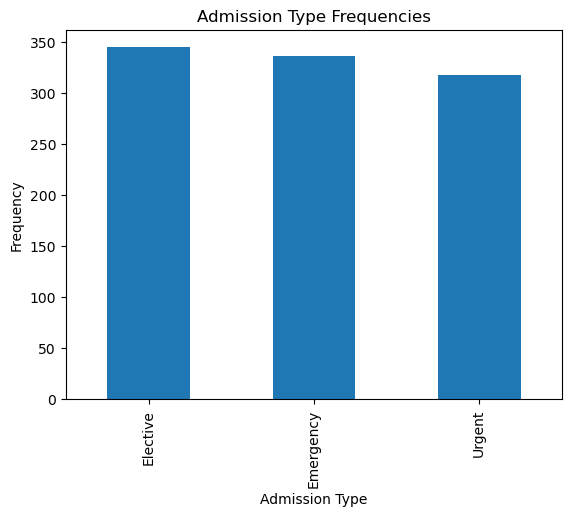

In [14]:
df['Admission_Type'].value_counts().plot(kind='bar')
plt.title('Admission Type Frequencies')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

In [15]:
import seaborn as sns

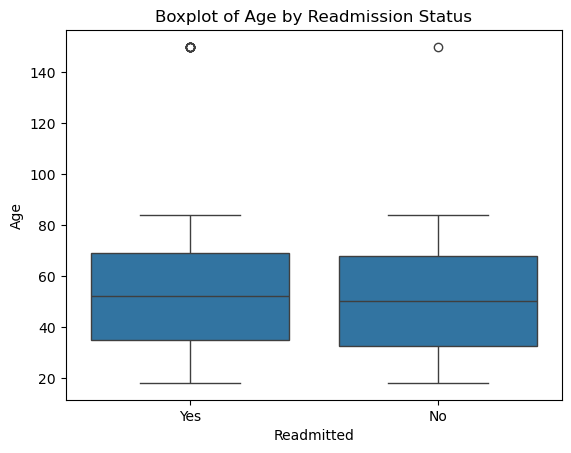

In [16]:
sns.boxplot(x='Readmitted', y='Age', data=df)
plt.title('Boxplot of Age by Readmission Status')
plt.show()

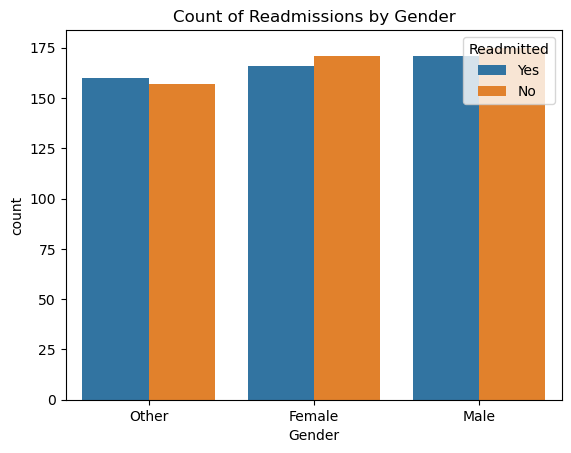

In [17]:
sns.countplot(x='Gender', hue='Readmitted', data=df)
plt.title('Count of Readmissions by Gender')
plt.show()

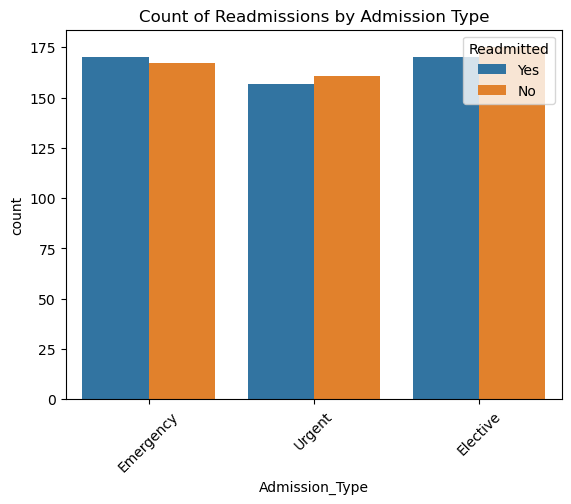

In [18]:
sns.countplot(x='Admission_Type', hue='Readmitted', data=df)
plt.title('Count of Readmissions by Admission Type')
plt.xticks(rotation=45)
plt.show()

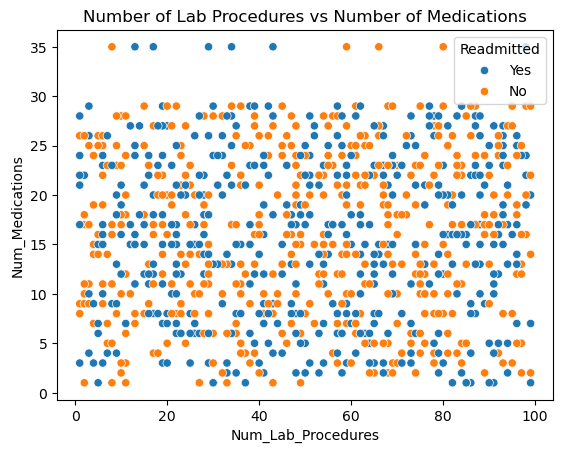

In [19]:
sns.scatterplot(x='Num_Lab_Procedures', y='Num_Medications', hue='Readmitted', data=df)
plt.title('Number of Lab Procedures vs Number of Medications')
plt.show()

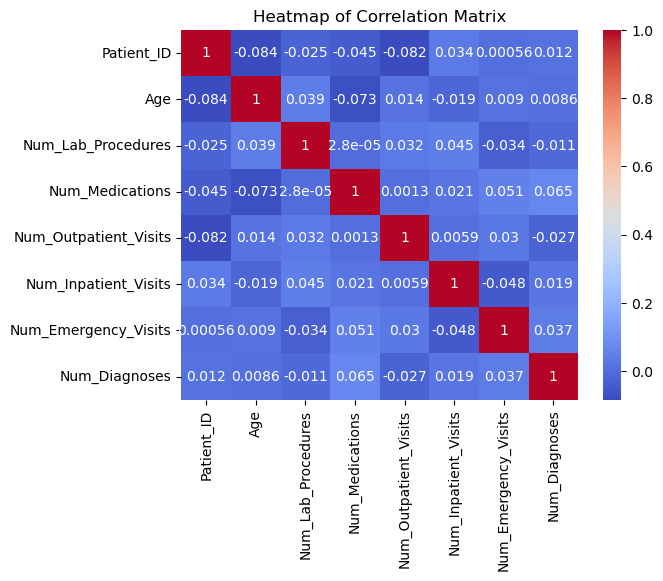

In [20]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

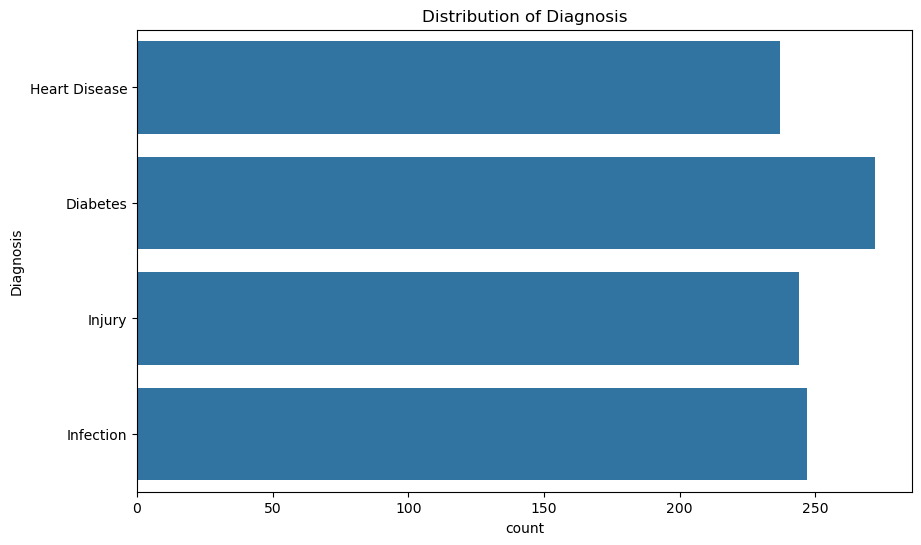

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y='Diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()


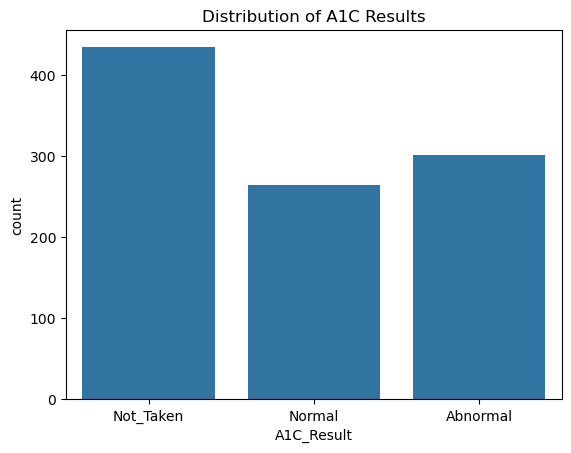

In [22]:
sns.countplot(x='A1C_Result', data=df)
plt.title('Distribution of A1C Results')
plt.show()

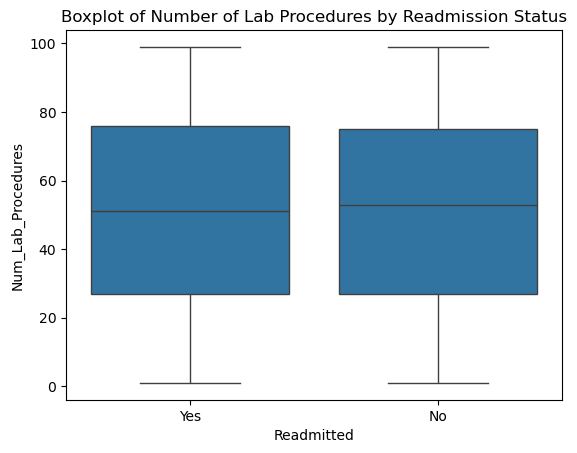

In [23]:
sns.boxplot(x='Readmitted', y='Num_Lab_Procedures', data=df)
plt.title('Boxplot of Number of Lab Procedures by Readmission Status')
plt.show()

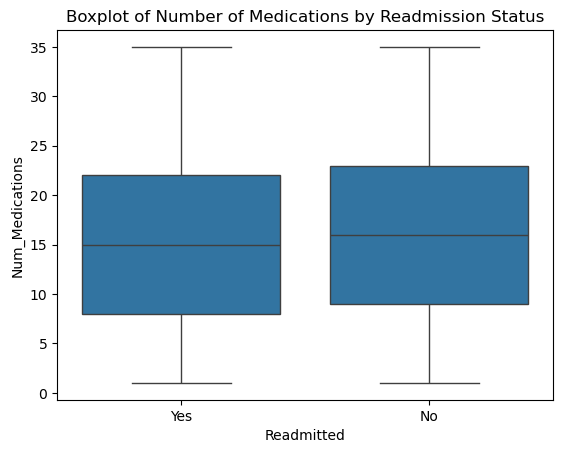

In [24]:
sns.boxplot(x='Readmitted', y='Num_Medications', data=df)
plt.title('Boxplot of Number of Medications by Readmission Status')
plt.show()

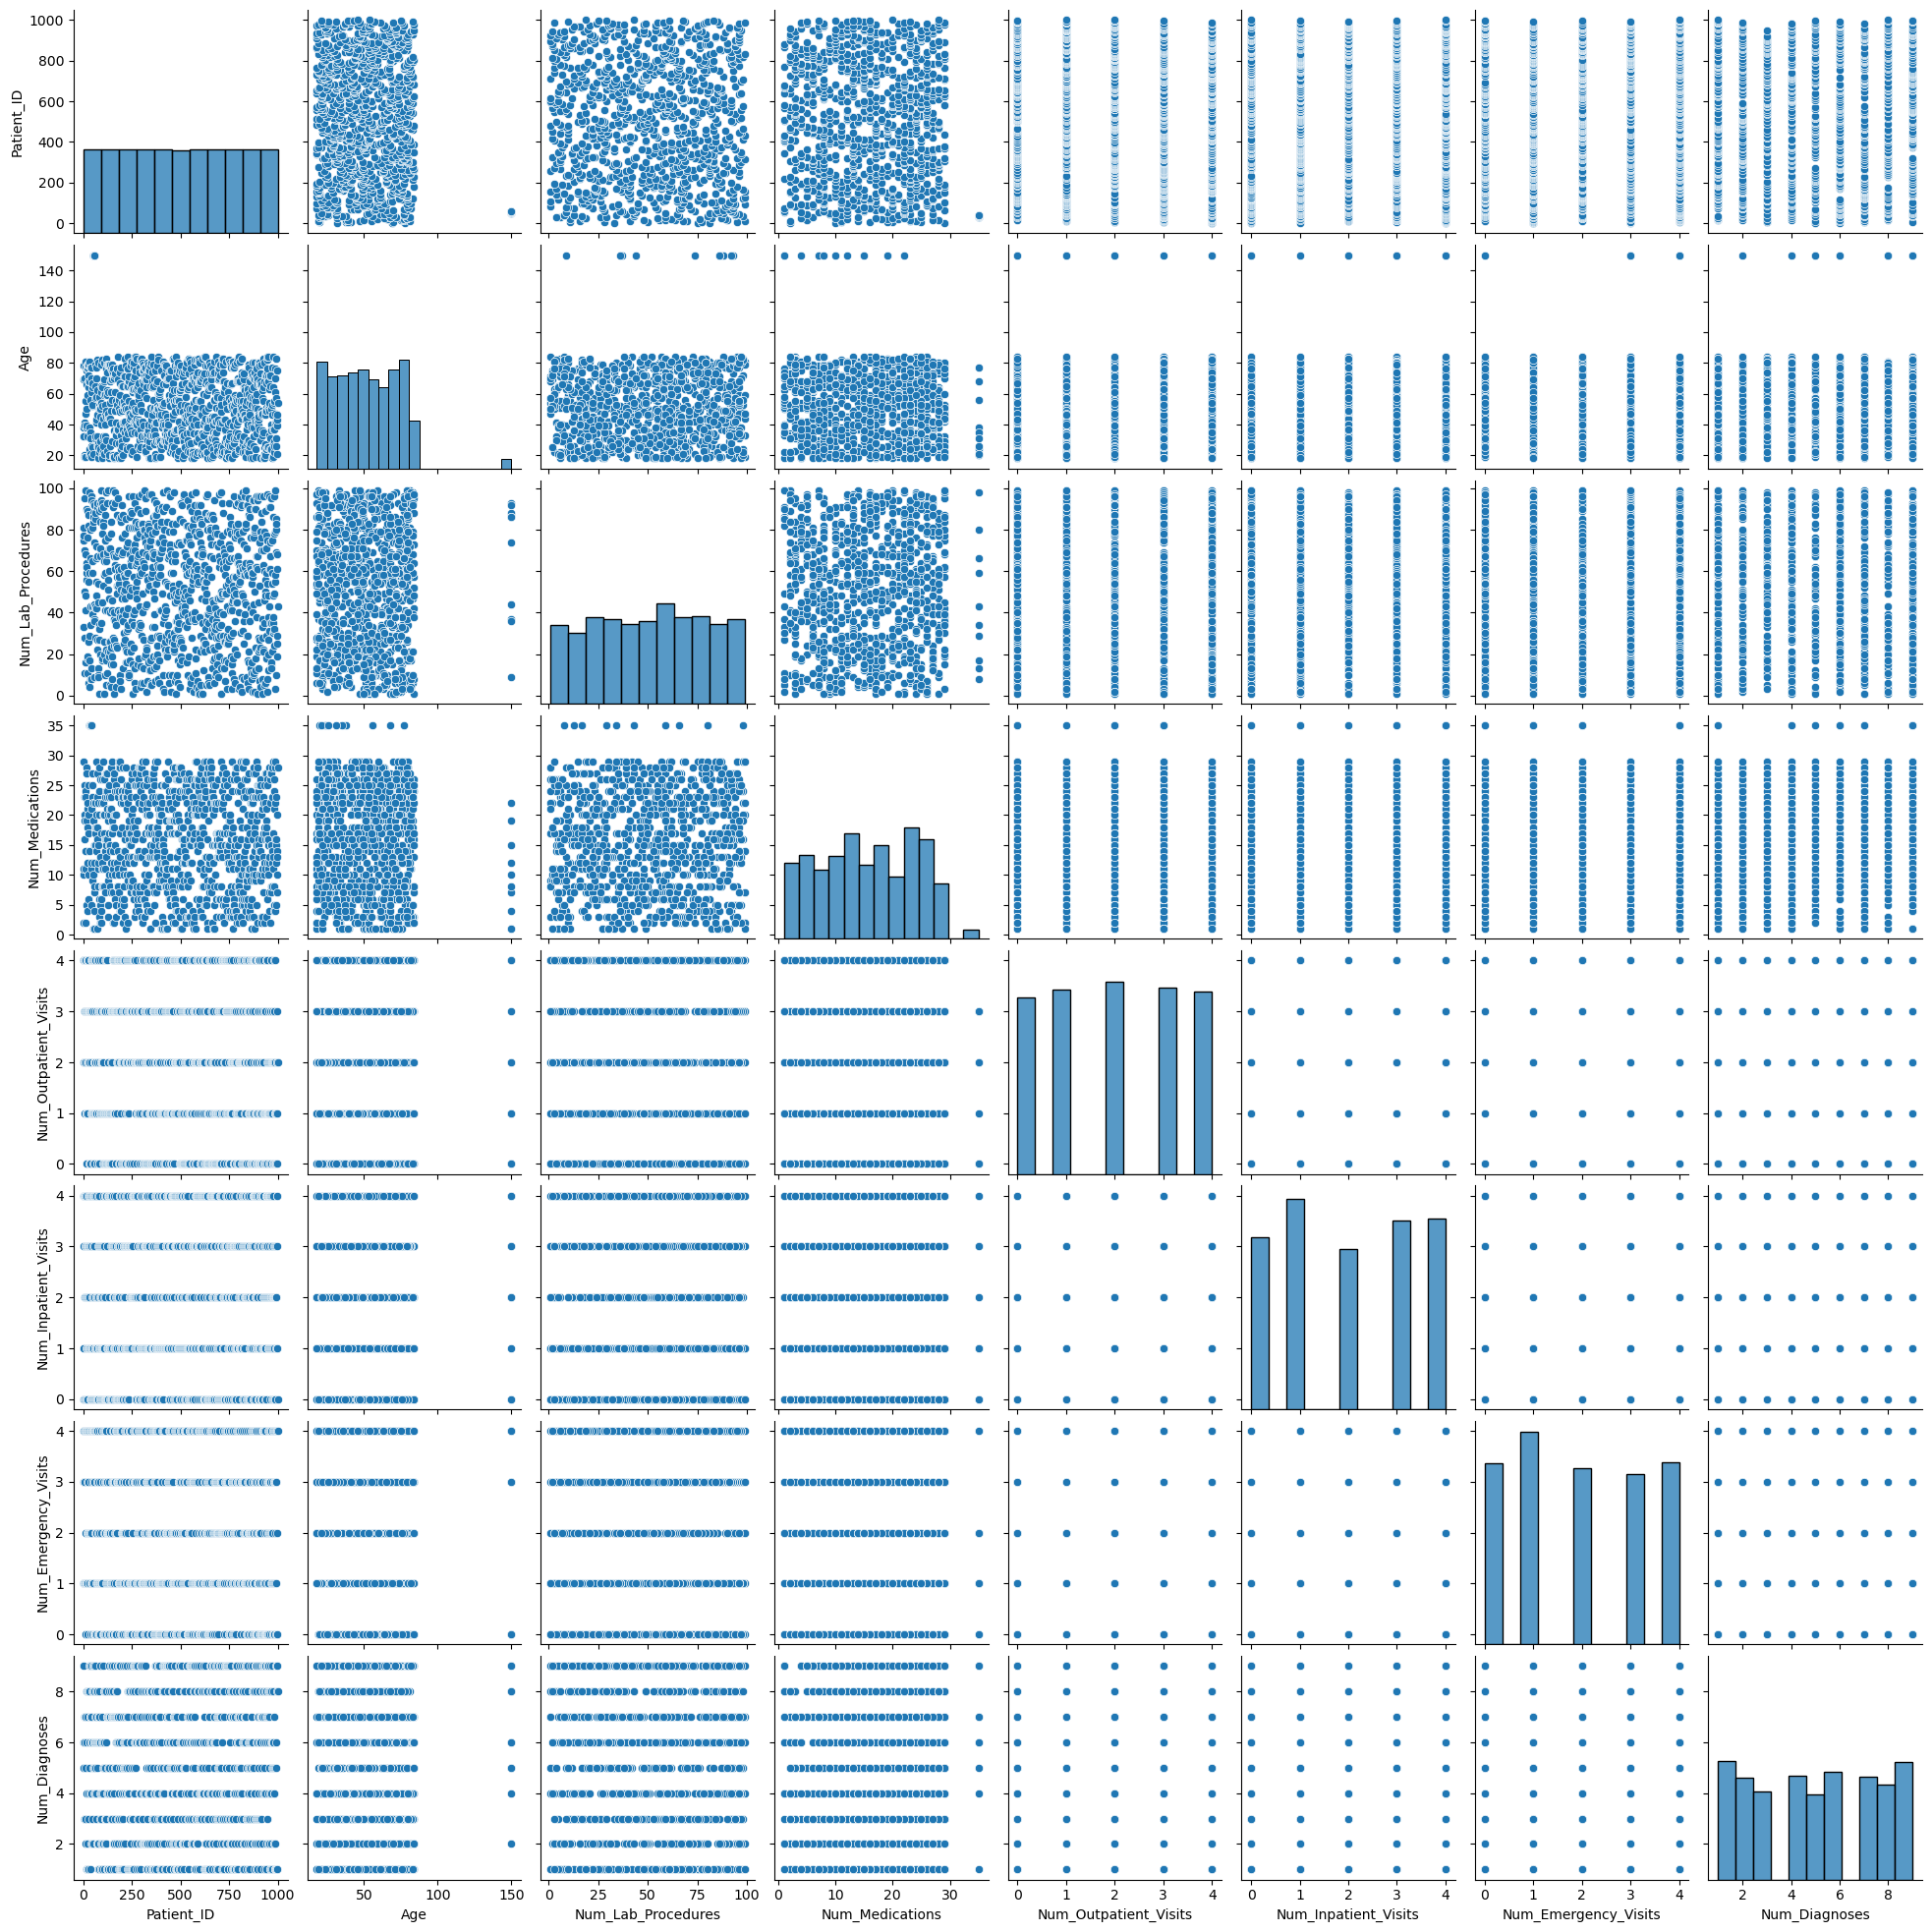

In [25]:
sns.pairplot(df)
plt.show()

#FEATURE ENGINEERING:

In [26]:
df['High_Risk'] = (
    ((df['Age'] > 40) & (df['Age'] < 100)) |  # Age greater than 40 and less than 100
    (df['Diagnosis'].isin(['Heart Disease', 'Injury', 'Elective'])) |  # Diagnosed with Heart Disease, Injury, or Elective
    (df['Num_Medications'] > df['Num_Medications'].mean()) |  # Taking more medications than average
    (df['Num_Emergency_Visits'] > 0) |  # Has emergency visits
    (df['Readmitted'] == 'Yes')  # Was readmitted
)

In [27]:
df['High_Risk'].value_counts()

True     994
False      6
Name: High_Risk, dtype: int64

In [28]:
df=df[df['High_Risk']== True]

In [29]:
df

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,High_Risk
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Not_Taken,Yes,True
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,Not_Taken,No,True
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,True
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,Not_Taken,Yes,True
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Not_Taken,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No,True
996,997,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No,True
997,998,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No,True
998,999,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No,True


In [30]:
df=df.copy()
df['Total_Visits'] = df['Num_Outpatient_Visits'] + df['Num_Inpatient_Visits'] + df['Num_Emergency_Visits']
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Num_Lab_Procedures'] = (df['Num_Lab_Procedures'] - df['Num_Lab_Procedures'].min()) / (df['Num_Lab_Procedures'].max() - df['Num_Lab_Procedures'].min())
df['Num_Medications'] = (df['Num_Medications'] - df['Num_Medications'].min()) / (df['Num_Medications'].max() - df['Num_Medications'].min())
df['Total_Visits'] = (df['Total_Visits'] - df['Total_Visits'].min()) / (df['Total_Visits'].max() - df['Total_Visits'].min())


In [31]:
df['Critical_Diagnosis'] = df['Diagnosis'].apply(lambda x: 1 if x in ['Heart Disease', 'Injury'] else 0)


In [32]:
df

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,High_Risk,Total_Visits,Critical_Diagnosis
0,1,0.386364,Other,Emergency,Heart Disease,0.326531,0.029412,4,1,1,5,Not_Taken,Yes,True,0.500000,1
1,2,0.106061,Female,Urgent,Diabetes,0.816327,0.264706,4,4,1,6,Not_Taken,No,True,0.750000,0
2,3,0.454545,Female,Urgent,Heart Disease,0.755102,0.823529,4,0,3,5,Normal,No,True,0.583333,1
3,4,0.151515,Male,Elective,Diabetes,0.775510,0.294118,2,3,4,9,Not_Taken,Yes,True,0.750000,0
4,5,0.174242,Female,Urgent,Diabetes,0.500000,0.705882,3,4,1,3,Not_Taken,Yes,True,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.022727,Female,Emergency,Heart Disease,0.683673,0.264706,2,3,2,9,Normal,No,True,0.583333,1
996,997,0.189394,Female,Emergency,Heart Disease,0.612245,0.176471,0,4,0,1,Normal,No,True,0.333333,1
997,998,0.431818,Male,Urgent,Diabetes,0.285714,0.352941,3,1,4,8,Normal,No,True,0.666667,0
998,999,0.212121,Other,Elective,Injury,0.183673,0.558824,1,4,4,1,Abnormal,No,True,0.750000,1


MODEL BUILDING:

In [33]:
# Convert categorical variables to numerical using one hot encoding
df_new = pd.get_dummies(df, columns=['Gender', 'Admission_Type', 'Diagnosis', 'A1C_Result', 'Readmitted','High_Risk'])



In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                994 non-null    int64  
 1   Age                       994 non-null    float64
 2   Num_Lab_Procedures        994 non-null    float64
 3   Num_Medications           994 non-null    float64
 4   Num_Outpatient_Visits     994 non-null    int64  
 5   Num_Inpatient_Visits      994 non-null    int64  
 6   Num_Emergency_Visits      994 non-null    int64  
 7   Num_Diagnoses             994 non-null    int64  
 8   Total_Visits              994 non-null    float64
 9   Critical_Diagnosis        994 non-null    int64  
 10  Gender_Female             994 non-null    uint8  
 11  Gender_Male               994 non-null    uint8  
 12  Gender_Other              994 non-null    uint8  
 13  Admission_Type_Elective   994 non-null    uint8  
 14  Admission_

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X=df_new.drop(['Readmitted_No','Readmitted_Yes'],axis=1)
y=df_new['Readmitted_Yes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.5183946488294314


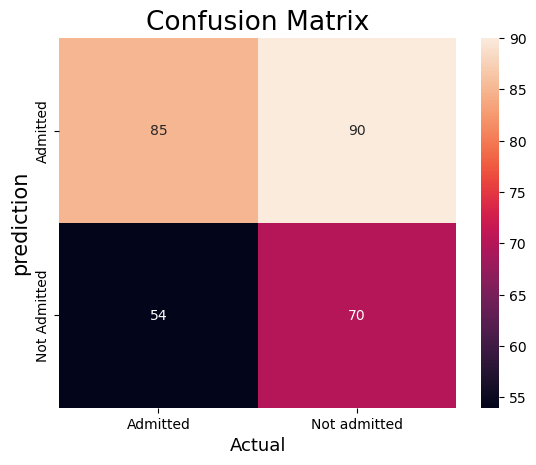

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_pred,y_test)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Admitted','Not admitted'],yticklabels=['Admitted','Not Admitted'])
plt.ylabel("prediction",fontsize=15)
plt.xlabel("Actual",fontsize=13)
plt.title('Confusion Matrix',fontsize=19)

plt.show()

In [38]:
#Using label encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding on categorical columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Admission_Type'] = le.fit_transform(df['Admission_Type'])
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])
df['A1C_Result'] = le.fit_transform(df['A1C_Result'])
df['Readmitted'] = le.fit_transform(df['Readmitted'])
df['High_Risk'] = le.fit_transform(df['High_Risk'])

In [39]:
df

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,High_Risk,Total_Visits,Critical_Diagnosis
0,1,0.386364,2,1,1,0.326531,0.029412,4,1,1,5,2,1,0,0.500000,1
1,2,0.106061,0,2,0,0.816327,0.264706,4,4,1,6,2,0,0,0.750000,0
2,3,0.454545,0,2,1,0.755102,0.823529,4,0,3,5,1,0,0,0.583333,1
3,4,0.151515,1,0,0,0.775510,0.294118,2,3,4,9,2,1,0,0.750000,0
4,5,0.174242,0,2,0,0.500000,0.705882,3,4,1,3,2,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.022727,0,1,1,0.683673,0.264706,2,3,2,9,1,0,0,0.583333,1
996,997,0.189394,0,1,1,0.612245,0.176471,0,4,0,1,1,0,0,0.333333,1
997,998,0.431818,1,2,0,0.285714,0.352941,3,1,4,8,1,0,0,0.666667,0
998,999,0.212121,2,0,3,0.183673,0.558824,1,4,4,1,0,0,0,0.750000,1


In [40]:
X=df.drop(['Readmitted'],axis=1)
y=df["Readmitted"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [41]:
accuracy_score(y_pred, y_test)

0.5016722408026756

In [51]:
from sklearn.neural_network import MLPClassifier

# Define the model
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)


In [52]:
accuracy_score(y_pred, y_test)

0.5117056856187291

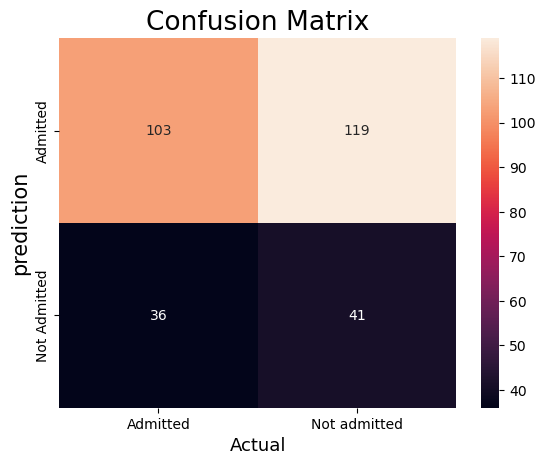

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_pred,y_test)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Admitted','Not admitted'],yticklabels=['Admitted','Not Admitted'])
plt.ylabel("prediction",fontsize=15)
plt.xlabel("Actual",fontsize=13)
plt.title('Confusion Matrix',fontsize=19)

plt.show()